In [32]:
import numpy as np
from uncertainties import ufloat
import uncertainties.unumpy as unp 

import pandas as pd
import matplotlib.pyplot as plt

import copy

In [33]:
# values
m = 0.324 #Kg Probengewicht
M = 0.0635 #Kg/Mol molare Masse von Cu
kappa = 137.8 * 10**9 #Pa
rho = 8960 #Kg/m**3

In [34]:
# read in data
df = pd.read_csv('data.csv')
print(df.keys())

Index(['U_p', 't', 'R_p', 'R_g', 'I_p', 'I_g'], dtype='object')


In [35]:
# uncertainties
err_R = 0.1 #Ohm
err_U = 0.01 #V
err_I = 0.1 #mA
err_t = 5 #s

In [36]:
# define measures with uncertainties

R_p = unp.uarray(df['R_p'].to_numpy(), err_R)
R_g = unp.uarray(df['R_g'].to_numpy(), err_R)

U_p = unp.uarray(df['U_p'].to_numpy(), err_U)
I_p = unp.uarray(df['I_p'].to_numpy(), err_I)

t = unp.uarray(df['t'].to_numpy(), err_t)

In [37]:
# get temperature from resistance
def T_func(R):
    return 0.00134*R**2 + 2.296*R - 243.02 + 272.15

T_p = T_func(R_p)
T_g = T_func(R_g)

In [38]:
# create delta t from t

delta_t = np.zeros_like(t)
delta_t[0] = ufloat(0,0)

for i in range(len(t)-1):
    delta_t[i+1] = t[i+1]-t[i]

In [39]:
# create delta T from T

delta_T_p = copy.deepcopy(T_p)
delta_T_p[0] = ufloat(0,0)

for i in range(len(T_p)-1):
    delta_T_p[i+1] = T_p[i+1]-T_p[i]

In [40]:
delta_T_p

array([0.0+/-0, 2.1314034000000106+/-0.33491777622312013,
       9.26116620000002+/-0.33582816820630157,
       10.019150399999972+/-0.3373632812422834,
       9.826199400000007+/-0.3389361212379702,
       10.112575200000009+/-0.3405090492166104,
       9.917399799999998+/-0.34208188969660464,
       9.962450600000011+/-0.34363582356884737,
       10.007501399999995+/-0.34518975747701436,
       10.05255219999998+/-0.34674369142062267,
       10.097602999999992+/-0.3482976253991979,
       9.894735999999995+/-0.3498325674220741,
       9.937615999999991+/-0.35134860081736485,
       9.980495999999988+/-0.3528646342431046,
       10.023376000000042+/-0.35438066769890253,
       9.814076999999997+/-0.35587771090575476,
       10.108063999999985+/-0.3573748338609197,
       9.896647799999982+/-0.35887187745712257,
       10.192751999999984+/-0.36036900013580525,
       9.979218600000081+/-0.36186604411444856,
       10.01998139999995+/-0.36334417705949273,
       10.060744199999988+/-0.3

# Temperature Progress

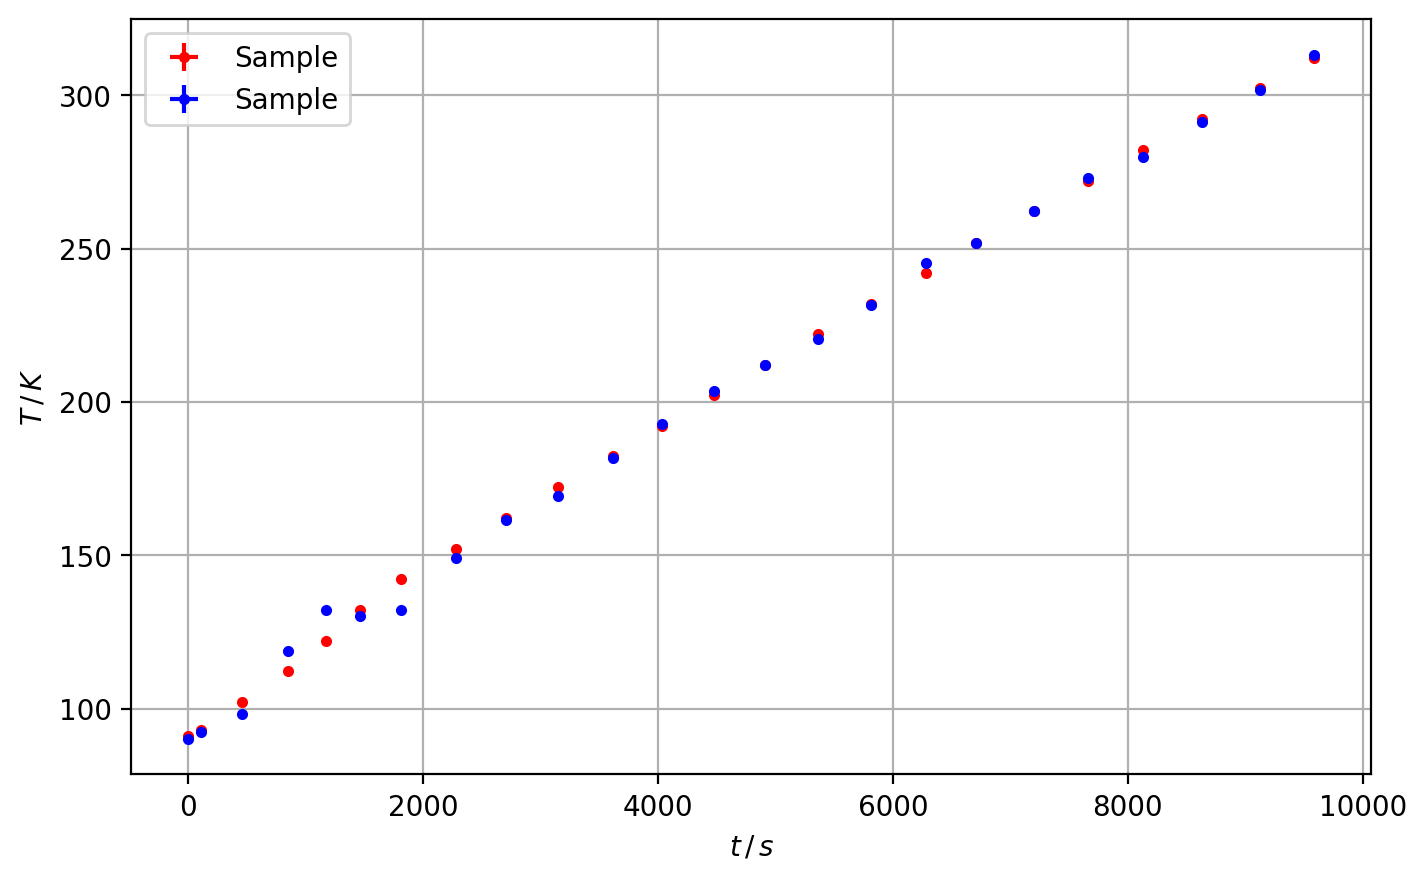

In [41]:
plt.figure(figsize=(8,5), dpi=200)

plt.errorbar(unp.nominal_values(t), unp.nominal_values(T_p), yerr=unp.std_devs(T_p), xerr=unp.std_devs(t), fmt='r.', label='Sample')
plt.errorbar(unp.nominal_values(t), unp.nominal_values(T_g), yerr=unp.std_devs(T_g), xerr=unp.std_devs(t), fmt='b.', label='Sample')

plt.xlabel(r'$t \, / \, s$')
plt.ylabel(r'$T \, / \, K$')

plt.grid()
plt.legend()
plt.savefig('build/temperature_progress.pdf')
plt.show()

# Heat capacity C_p

In [42]:
# ignore first value due no temperature difference

U_p = U_p[1:]
I_p = I_p[1:]
T_p = T_p[1:]
delta_T_p = delta_T_p[1:]
t = t[1:]
delta_t = delta_t[1:]

In [43]:
# supplied energy 
def E_func(U,I,delta_t):
    return U*I*delta_t

E = E_func(U_p, I_p/1000, delta_t)
E

array([259.78889999999996+/-17.49665583019295,
       880.5817929999998+/-17.858655264375866,
       986.5543869999998+/-17.863051995429558,
       862.28403+/-18.89176380008995, 1017.944+/-24.329804408124616,
       1182.68115+/-24.398049536307713, 1314.54488+/-19.808358355451873,
       1198.6207000000002+/-19.96798558788042,
       1268.74048+/-20.05374177962746, 1334.98189+/-20.115833324459864,
       1181.561025+/-20.156663980979097, 1245.673744+/-20.183194478613636,
       1250.723892+/-20.218830005202875, 1285.7724+/-20.232625844145886,
       1307.3193350000001+/-20.25744521683828,
       1325.288422+/-20.270521495956956,
       1217.9564999999998+/-20.28969136459756,
       1419.4224+/-20.31110163402271, 1319.0592+/-20.306375180381156,
       1346.95984+/-20.296036251980336,
       1433.8055000000004+/-20.31244625509321,
       1433.8055000000004+/-20.31244625509321,
       1319.142+/-20.307644220105885], dtype=object)

In [44]:
delta_T_p

array([2.1314034000000106+/-0.33491777622312013,
       9.26116620000002+/-0.33582816820630157,
       10.019150399999972+/-0.3373632812422834,
       9.826199400000007+/-0.3389361212379702,
       10.112575200000009+/-0.3405090492166104,
       9.917399799999998+/-0.34208188969660464,
       9.962450600000011+/-0.34363582356884737,
       10.007501399999995+/-0.34518975747701436,
       10.05255219999998+/-0.34674369142062267,
       10.097602999999992+/-0.3482976253991979,
       9.894735999999995+/-0.3498325674220741,
       9.937615999999991+/-0.35134860081736485,
       9.980495999999988+/-0.3528646342431046,
       10.023376000000042+/-0.35438066769890253,
       9.814076999999997+/-0.35587771090575476,
       10.108063999999985+/-0.3573748338609197,
       9.896647799999982+/-0.35887187745712257,
       10.192751999999984+/-0.36036900013580525,
       9.979218600000081+/-0.36186604411444856,
       10.01998139999995+/-0.36334417705949273,
       10.060744199999988+/-0.3648223100

In [45]:
# heat capacity C_p
C_p = M*E/(m*delta_T_p)
C_p #J*M

array([23.8882124001629+/-4.083928770561287,
       18.63514338484057+/-0.7742515656244927,
       19.29829101759071+/-0.7378003647237917,
       17.198615407514325+/-0.7027855261905591,
       19.7283533466454+/-0.8146274786385823,
       23.37214482349982+/-0.9393590132095077,
       25.860561610299367+/-0.9734146760788016,
       23.473877247079916+/-0.8991753920293462,
       24.735755226148882+/-0.938526952766348,
       25.911096839725126+/-0.9753130644038145,
       23.403491889713077+/-0.9187256239598899,
       24.566925823638453+/-0.9554390246620177,
       24.560547070636225+/-0.9548134022052556,
       25.14078257332316+/-0.9729256618915055,
       26.107238603805897+/-1.0295119685874607,
       25.69633206977554+/-0.9898753016390017,
       24.119726428983395+/-0.9625087127433696,
       27.292851495520257+/-1.0409870089479756,
       25.905767663864623+/-1.0205436590622003,
       26.346106740894164+/-1.0345588013059164,
       27.93115212068818+/-1.0873896407746009,
    

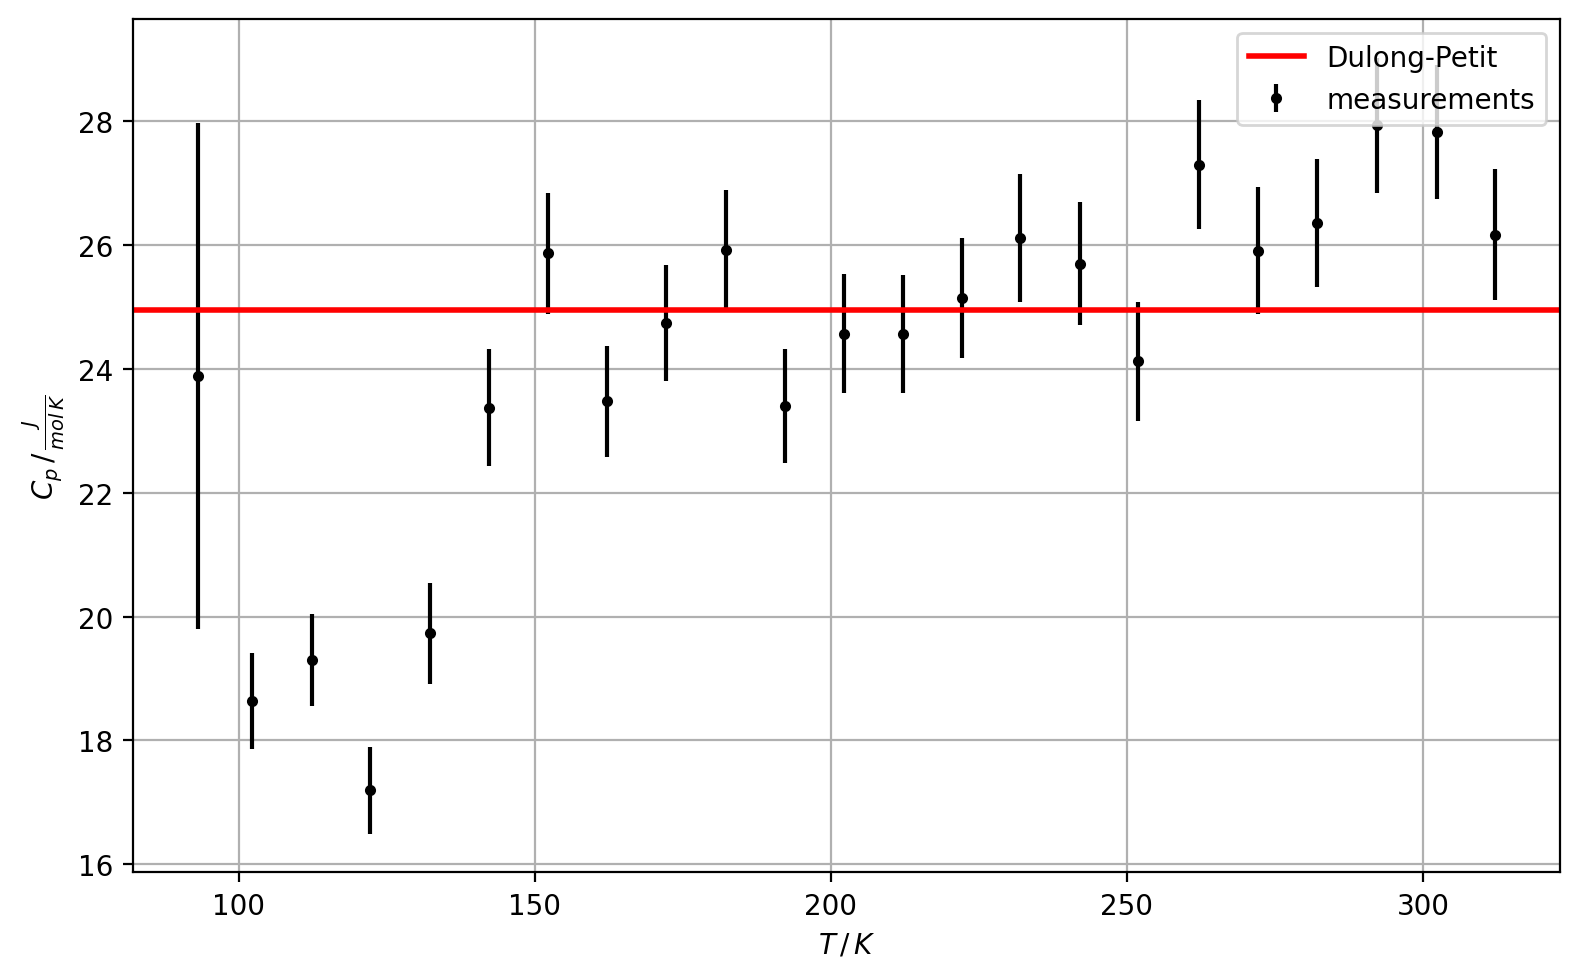

In [46]:
plt.figure(figsize=(8,5), dpi=200)
plt.errorbar(unp.nominal_values(T_p), unp.nominal_values(C_p), yerr=unp.std_devs(C_p),  fmt='k.', label='measurements')
plt.axhline(3*8.314, color='red', linewidth=2, label='Dulong-Petit')
plt.xlabel(r'$T \, / \, K$')
plt.ylabel(r'$C_p \, / \, \frac{J}{mol \, K}$')

plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('build/C_p.pdf')
plt.show()